# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file="./train.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_in, y_train_in = train['features'], train['labels']
X_test_in, y_test_in = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train_in = len(y_train_in)

# TODO: Number of testing examples.
n_test = len(y_test_in)

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'][0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train_in))

print("Number of training examples =", n_train_in)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

1


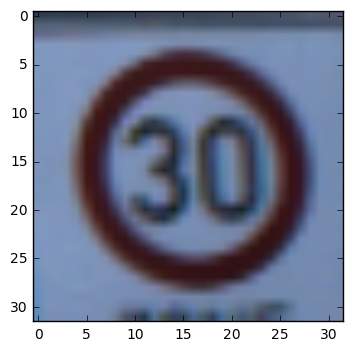

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#Visualize Random Training Image from Raw Data
import random
rand_index = random.randint(0,n_train_in)
plt.imshow(X_train_in[rand_index])
print(y_train_in[rand_index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [5]:
import numpy as np
import cv2
def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
    
    #Perform Transformations
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

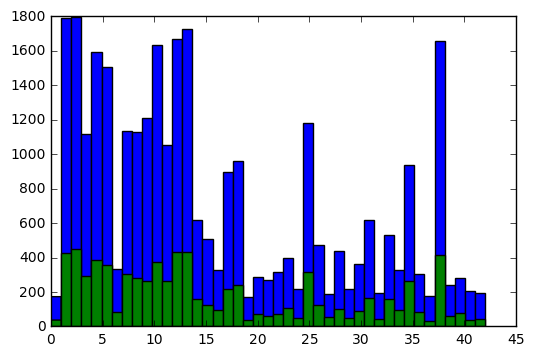

In [6]:
#Plot distribution of the input training data
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X_train_in, y_train_in = shuffle(X_train_in, y_train_in)
#Split training raw training data data into Training and Validation
X_train_raw, X_valid_raw, y_train_raw, y_valid_raw = train_test_split(X_train_in, y_train_in, \
                                                                 test_size=0.2)

#Distribution of Training and Validation Set
plt.hist(y_train_raw,max(y_train_raw)-min(y_train_raw)+1)
print()
plt.hist(y_valid_raw,max(y_valid_raw)-min(y_valid_raw)+1)
print()

In [7]:
from collections import defaultdict
import random
label_indices =defaultdict(list)

#Append label indices into a dict
for index,label in enumerate(y_train_raw):
    label_indices[label].append(index)

label_sizes =[len(label_indices[label]) for label in label_indices.keys()]
max_label_size = max(label_sizes)
total_images_add = (max_label_size * 43) - sum(label_sizes)
print("total images to add: ", total_images_add)
X_augument = []
y_augument = []
index =0
for j,label in enumerate(label_indices.keys()):
    current_label_size = len(label_indices[label])
    num_images_add = max_label_size- current_label_size
    #num_images_add = 1
    for i in range(num_images_add):
        #get random image from label list
        random_index = random.choice(label_indices[label])
        #skew,rotate image
        X_augument.append(transform_image(X_train_raw[random_index], \
                                                    5,5,5))
        y_augument.append(label)
        #append to list
        index +=1
        #print(label)
print("Index:", index)

X_train_total = np.concatenate((X_train_raw, X_augument), axis=0)
y_train_total = np.concatenate((y_train_raw,y_augument), axis=0)
print("Number of Images Initially:", len(X_train_raw))
print("Number of Images Augumented:", len(X_augument))
print("Total Number of Images finally:", len(X_train_total))
#print(y_augument)



total images to add:  45990
Index: 45990
Number of Images Initially: 31367
Number of Images Augumented: 45990
Total Number of Images finally: 77357


In [8]:
#Normalize the R,G,B channels
X_train = (X_train_total - 127.5)/255.0
X_valid = (X_valid_raw - 127.5)/255.0

In [9]:
#Shuffle the data before feeding to TensorFlow
#Shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
y_train = y_train_total
y_valid = y_valid_raw
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

In [10]:
#Start of the DeepLearning
### Train your model here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten
import tensorflow as tf

#Modify input and output layers as input is color, output has 43 labels
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.02
    relu_shift = 0.01
    
    L1_filtnum = 16
    L2_filtnum = 64
    
    #fc1_neurnum =
    #fc2_neurnum = 

    #conv0_W = tf.Variable(tf.truncated_normal(shape=(1,1, 3, 16 ),mean = mu, stddev = sigma))
    #conv0_b = tf.Variable(tf.zeros(3))

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x16.
    #decreasing initial layer filter size
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3,3, 3, L1_filtnum ),\
                                              mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(L1_filtnum))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1 + relu_shift)
    conv1 = tf.nn.dropout(x=conv1, keep_prob=convdkp)

    # SOLUTION: Pooling. Input = 32x32x16. Output = 16x16x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 16x16x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(7, 7, L1_filtnum, L2_filtnum), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(L2_filtnum))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2 +relu_shift)
    conv2 = tf.nn.dropout(x=conv2, keep_prob=convdkp)

    # SOLUTION: Pooling. Input = 16x16x64 Output = 8x8x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # SOLUTION: Flatten. Input = 8x8x64. Output = 4096.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 4096 Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(4096, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1+relu_shift) #Adding small bias as per CS231n
    
    #add dropout
    fc1 = tf.nn.dropout(x=fc1, keep_prob=fcdkp)

    # SOLUTION: Layer 4: Fully Connected. Input = 4096. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2 +relu_shift) #Adding small bias as per CS231n  
    #add dropout
    fc2 = tf.nn.dropout(x=fc2, keep_prob=fcdkp)

    # SOLUTION: Layer 5: Fully Connected. Input = 512. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [11]:
#Define placeholders for Tensorflow
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
fcdkp= tf.placeholder(tf.float32)
convdkp= tf.placeholder(tf.float32)
#phase_train = tf.placeholder(tf.bool)
to_train= tf.placeholder(tf.bool)
iteration_num= tf.placeholder(tf.int32)
one_hot_y = tf.one_hot(y, 43)

#Define Cross Entropy
rate = 0.001
beta = 0.01
logits = LeNet(x)
train_vars   = tf.trainable_variables() 
#print(train_vars)
lossL2 = tf.add_n([tf.nn.l2_loss(v) for v in train_vars])*0.0003 #0.0003 is the best
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy+lossL2) #Regularization
#loss_operation = tf.reduce_mean(cross_entropy) #No Regularization
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
predicted_labels = tf.argmax(logits, 1)
true_labels = tf.argmax(one_hot_y, 1)
correct_prediction = tf.equal(predicted_labels, true_labels)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
loss_value = tf.cast(loss_operation,tf.float32)+lossL2

In [12]:
#Accuracy Evaluation Function
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    print("Input Dataset: ",num_examples)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def evaluate(X_data, y_data,batch_fcdkp=1.0,batch_convdkp=1.0, bn_train = False):
    num_examples = len(X_data)
    print("Input Dataset: ",num_examples)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, fcdkp:batch_fcdkp,\
                                                           convdkp:batch_convdkp,to_train: bn_train})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def GetEvalMetrics(X_data, y_data,batch_fcdkp=1.0,batch_convdkp=1.0,get_labels =False, bn_train = False):
    num_examples = len(X_data)
    #print("Input Dataset: ",num_examples)
    total_accuracy = 0
    total_loss =0
    
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        mean_loss, accuracy = sess.run([loss_value, accuracy_operation],\
                                       feed_dict={x: batch_x, y: batch_y, fcdkp:batch_fcdkp,convdkp:batch_convdkp
                                                 ,to_train: bn_train})
            
        total_accuracy += (accuracy * len(batch_x))
        total_loss+= (mean_loss*len(batch_x))

    return total_accuracy / num_examples, total_loss/ num_examples

def GetEvalMetricswithLabels(X_data, y_data,batch_fcdkp=1.0,batch_convdkp=1.0,bn_train = False):
    num_examples = len(X_data)
    #print("Input Dataset: ",num_examples)
    total_accuracy = 0
    total_loss =0
    total_predicted_labels =[]

    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        mean_loss, accuracy,out_labels = sess.run([loss_value, accuracy_operation, predicted_labels], \
                                                  feed_dict={x: batch_x, y: batch_y, fcdkp:batch_fcdkp,convdkp:batch_convdkp
                                                            ,to_train: bn_train})          
        total_accuracy += (accuracy * len(batch_x))
        total_loss+= (mean_loss*len(batch_x))
        total_predicted_labels.append(out_labels.flatten().tolist())

    return total_accuracy / num_examples, total_loss/ num_examples,total_predicted_labels

In [13]:
#Define Hyperparameters
#Shuffle the data before feeding to TensorFlow
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

EPOCHS = 50
BATCH_SIZE = 128



#Normalize the R,G,B channels
X_train_raw_norm = (X_train_raw- 127.5)/255.0
#X_augument_norm = (X_augument - 127.5)/255.0
X_valid_raw_norm = (X_valid_raw- 127.5)/255.0
#y_train_raw,y_augument,y_valid_raw


X_train = X_train_raw_norm
y_train = y_train_raw
X_valid = X_valid_raw_norm
y_valid = y_valid_raw

X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

In [14]:
#Train the model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
print(len(X_train))
print(len(y_train))

train_losses =[None]*EPOCHS
valid_losses=[None]*EPOCHS

train_accuracies =[None]*EPOCHS
valid_accuracies=[None]*EPOCHS

batch_fcdkp = 0.5
batch_convdkp = 0.7
batch_to_train = True

#tf.reset_default_graph()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,fcdkp: batch_fcdkp, convdkp: batch_convdkp\
                   ,to_train:batch_to_train })

        #print("Getting Metrics")
        #Get metrics
        #train_acc,train_loss = GetEvalMetrics(X_train,y_train)
        #train_losses[i] = train_loss
        #train_accuracies[i] = train_acc
        
        valid_acc,valid_loss = GetEvalMetrics(X_valid,y_valid)
        valid_losses[i] = valid_loss
        valid_accuracies[i] = valid_acc
        
        #print("EPOCH {} ...".format(i+1))
        #print("Validation Accuracy = {:.3f}".format(valid_acc))
        
        print("EPOCH {} ... Validation Accuracy={:.3f}".format(i+1,valid_acc))
        #print("Validation Accuracy = {:.3f}".format(valid_acc))
        print()
             
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    #saver.save(sess, 'C:/Users/kalyanramu/Documents/CarND-TrafficSignLab')
    saver.save(sess, './trafficsign')
    print("Model saved")

31367
31367
Training...

EPOCH 1 ... Validation Accuracy=0.445

EPOCH 2 ... Validation Accuracy=0.794

EPOCH 3 ... Validation Accuracy=0.925

EPOCH 4 ... Validation Accuracy=0.964

EPOCH 5 ... Validation Accuracy=0.971

EPOCH 6 ... Validation Accuracy=0.977

EPOCH 7 ... Validation Accuracy=0.987

EPOCH 8 ... Validation Accuracy=0.985

EPOCH 9 ... Validation Accuracy=0.984

EPOCH 10 ... Validation Accuracy=0.989

EPOCH 11 ... Validation Accuracy=0.990

EPOCH 12 ... Validation Accuracy=0.988

EPOCH 13 ... Validation Accuracy=0.989

EPOCH 14 ... Validation Accuracy=0.989

EPOCH 15 ... Validation Accuracy=0.990

EPOCH 16 ... Validation Accuracy=0.991

EPOCH 17 ... Validation Accuracy=0.993

EPOCH 18 ... Validation Accuracy=0.990

EPOCH 19 ... Validation Accuracy=0.993

EPOCH 20 ... Validation Accuracy=0.992

EPOCH 21 ... Validation Accuracy=0.990

EPOCH 22 ... Validation Accuracy=0.991

EPOCH 23 ... Validation Accuracy=0.987

EPOCH 24 ... Validation Accuracy=0.990

EPOCH 25 ... Validation 

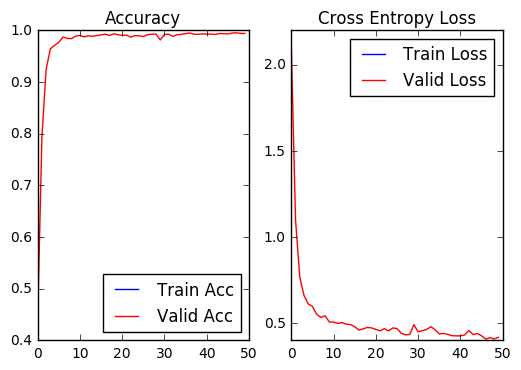

In [15]:
#Plot Training Results

f, axarr = plt.subplots(1,2)
axarr[0].plot(range(len(train_accuracies)),train_accuracies,'-b',label='Train Acc')
axarr[0].plot(range(len(valid_accuracies)),valid_accuracies,'-r',label='Valid Acc')
axarr[0].set_title("Accuracy")
axarr[0].legend(loc='lower right', shadow=False)

axarr[1].plot(range(len(train_losses)),train_losses,'-b',label='Train Loss')
axarr[1].plot(range(len(valid_losses)),valid_losses,'-r',label='Valid Loss')
axarr[1].set_title("Cross Entropy Loss")
axarr[1].legend(loc='upper right', shadow=False)

In [16]:
X_test = (X_test_in - 127.5)/255.0
y_test = y_test_in
X_test, y_test = shuffle(X_test, y_test)

In [17]:
#Test the model
import tensorflow as tf
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('trafficsign.meta')
    loader.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test,batch_fcdkp=1.0,batch_convdkp=1.0)
    #test_accuracy, test_loss,test_outlabels = GetEvalMetricswithLabels(X_test,y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Input Dataset:  12630
Test Accuracy = 0.958


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.




### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
Downloaded had two files a) Training b) Test File. The test file was never used until final verification.

Raw Training Data is divided into two sets
a) Training Data: Data to train Neural Network
b) Validation Data: Data to validate the accuracy of Network after an epoch.

Training Data is divided into batches to train the network. This is done because often times GPU's don't have the memory to accomodate the complete set of training data. Epoch is defined as one run of complete training data (all batches) through feedforward and backprop algorithms.

I generated augumented data initially however I was able to achieve similar accuracy without data augumentation and thus I ended up not using. I didn't delete source as it was good learning experience

### Define your architecture here.
### Feel free to use as many code cells as needed.



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
Architecture of the Neural Network
<img src="Architecture.png">

In [20]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Optimizer = AdamOptimizer
Batch Size = 125
Epochs = 50
Learning Rate = 0.01

I have used L2 Regularization along with dropout. Beta for regularization = 0.003
For convolutional layers dropout of 0.7 was used during training mode.
For fully connected layers dropout of 0.5 was during training phase (after training, there is no droput).

For initialization of weights, truncated normal distribution is used with mean of zero and standard deviation of 0.03.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I tried lot of combinations to come up with the solution.
To summarize, here is the approach I took
a) I increased the size of filters in convolutional layers and number of weights in fully connected layers until the training and validation accuracy got to 99%. In other words, I did overfit the model until I got the training & validation accuracy to 99%
b) Then I constrained the neural network model using Regularization and dropout until test accuracy increased.

The design philosphy I learned was to increase the model size and then restrict it through regularization and other techniques to get good performance. I was able to achieve 96% accuracy.

Below is the summary of techniques I tried and learned:
a) Data Augumentation
b) Add small bias to Relu's to converge faster
c) Regularization to contrain the model
d) Learning Rate decay to decrease noise in accuracy curves
e) Normalization: I used simple normalization here. I did try batch normalization but I couldn't get it working.
I will try to get it working later

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [2]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.pyplot as plt
import cv2

test_images = []
path = './test_images/'
for image in os.listdir(path):
    img = cv2.imread(path + image)
    img = cv2.resize(img, (32,32))
    test_images.append(img)

test_images = np.array(test_images)
test_images = pre_process_gray(test_images)

ImportError: dlopen(//anaconda/lib/python3.5/site-packages/cv2.cpython-35m-darwin.so, 2): Library not loaded: @rpath/libhdf5.10.dylib
  Referenced from: /anaconda/lib/libopencv_hdf.3.1.0.dylib
  Reason: Incompatible library version: libopencv_hdf.3.1.dylib requires version 12.0.0 or later, but libhdf5.10.dylib provides version 11.0.0

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [22]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [23]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.